https://www.teachmeaudio.com/mixing/techniques/audio-spectrum
https://www.toptal.com/algorithms/shazam-it-music-processing-fingerprinting-and-recognition

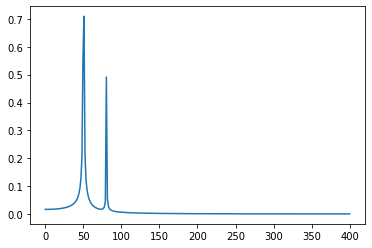

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
from scipy.io import wavfile
from scipy.signal import argrelextrema

# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

In [2]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (9, 7)
sampFreq, sound = wavfile.read('test.wav')

/tmp/ipykernel_189/3367458661.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampFreq, sound = wavfile.read('test.wav')


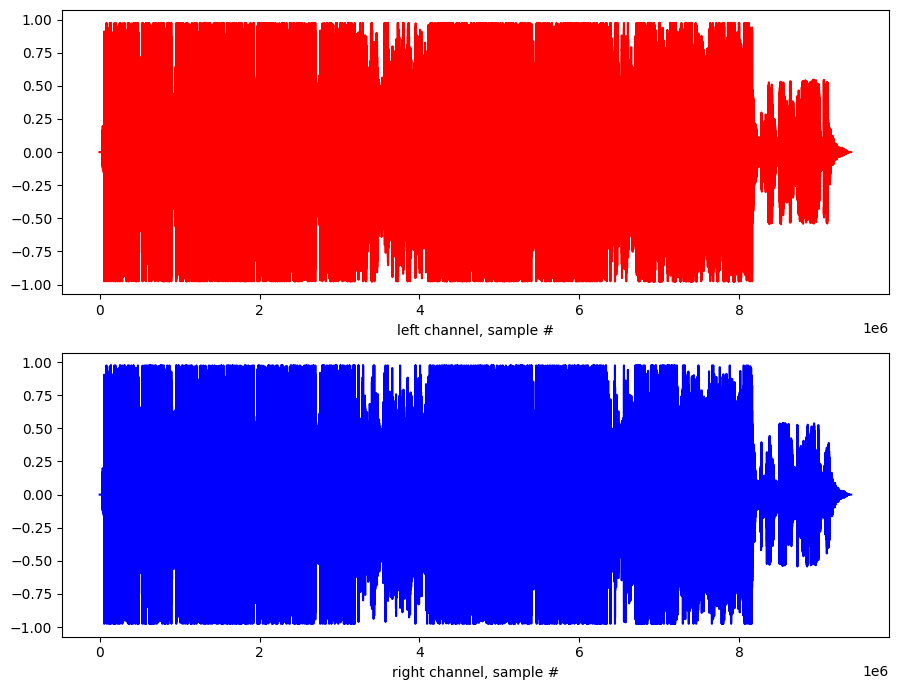

In [3]:
sound = sound / 2.0**15
length_in_s = sound.shape[0] / sampFreq
time = np.arange(sound.shape[0]) / sound.shape[0] * length_in_s

plt.subplot(2,1,1)
plt.plot(sound[:,0], 'r')
plt.xlabel("left channel, sample #")
plt.subplot(2,1,2)
plt.plot(sound[:,1], 'b')
plt.xlabel("right channel, sample #")
plt.tight_layout()
plt.show()

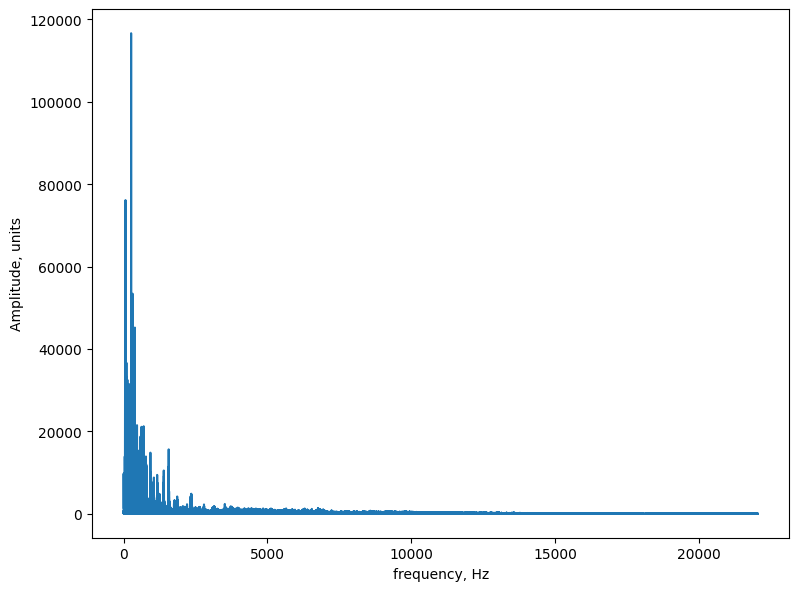

In [4]:
signal = sound[:,0]
fft_spectrum = np.fft.rfft(signal)
freq = np.fft.rfftfreq(signal.size, d=1./sampFreq)
fft_spectrum_abs = np.abs(fft_spectrum)
plt.plot(freq, fft_spectrum_abs)
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

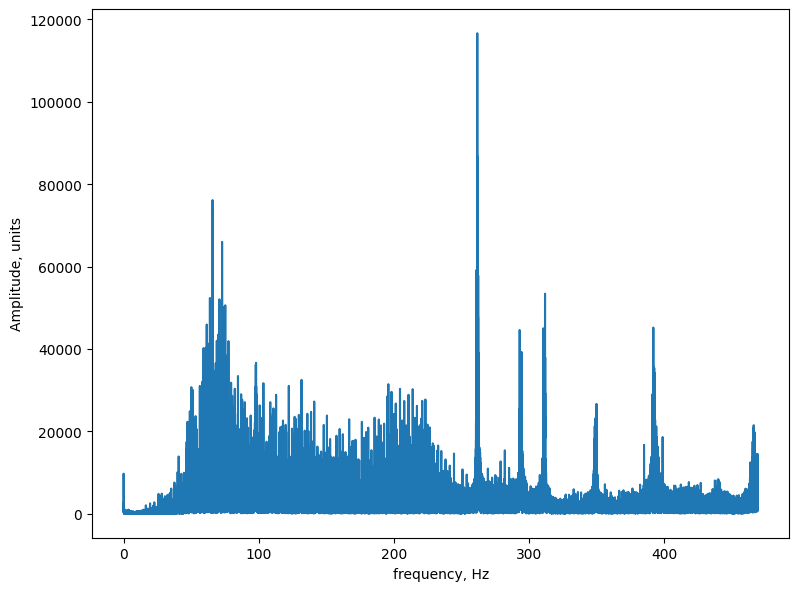

In [5]:
plt.plot(freq[:100000], fft_spectrum_abs[:100000])
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

(array([      1,       4,       6, ..., 4700861, 4700863, 4700867]),)


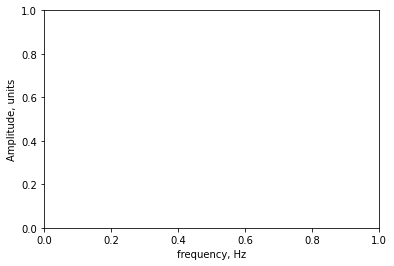

In [19]:


RANGE = [40, 80, 120, 180, 300]

def getIndex(freq):
    i = 0
    while(RANGE[i] < freq):
        i= i + 1
    return i

#fft_spectrum_abs is the result in the site

highestValue = []


localMax = argrelextrema(fft_spectrum_abs, np.greater)
y = [fft_spectrum_abs[localMax] for i in localMax]

print(localMax)


#plt.plot(freq[:100000], fft_spectrum_abs[:100000])
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
#plt.plot(localMax, y, 'rs')
plt.show()

